<a href="https://colab.research.google.com/github/Ram465/ML/blob/main/Lab4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Deriving the data
import numpy as np
import pandas as pd
df1=pd.read_excel(r"/content/dataset01.xlsx")
df=pd.DataFrame(df1)
def root_entropy(data, features):
    root_entropy = entropy_calc(data)
    feature_entropies = {}
    for f in features:
        unique_val = data[f].unique()
        #extracting unique values from dataset
        feature_entropy = 0
        for value in unique_val:
            subset = data[data[f] == value]
            feature_entropy += (len(subset) / len(data)) * entropy_calc(subset)
            #calculating entropy for each unique value
        feature_entropies[f] = feature_entropy
    return root_entropy, feature_entropies

#Finding the entropy of the entire dataset feature
def entropy_calc(data):
    # Counting the occurrences of each class
    class_count = data['buys_computer'].value_counts()
    # Calculating the entropy
    entropy = 0
    ttl_samples = len(data)
    for count in class_count:
        probability = count / ttl_samples
        entropy -= probability * np.log2(probability)
    return entropy

# Specifing the attributes
features = ['age', 'income', 'student','credit_rating','buys_computer']
# Calculating root entropy and entropies for each  and everyfeature
root_entropy, feature_entropies = root_entropy(df, features)
# Printing the results
print(f"Root Entropy is: {root_entropy}")
for feature, entropy in feature_entropies.items():
    print(f"Entropy for the {feature} column: {entropy}")

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


A1. For the data table provided below, calculate the entropy associated with each attribute / feature
at the root node. Using this information, identify the first feature that you’d select for constructing
the decision tree.

In [ ]:
# Calculating information gain
def calculate_information_gain(root_entropy, feature_entropy):
    info_gain = root_entropy - feature_entropy
    return info_gain
# Calculate root entropy
root_entropy = entropy_calc(df)

# Calculate feature entropies
features = ['age', 'income', 'student', 'credit_rating']
info_gains = {}

for feature in features:
    unique_values = df[feature].unique()
    feature_entropy = 0
    for value in unique_values:
        subset = df[df[feature] == value]
        feature_entropy += (len(subset) / len(df)) * entropy_calc(subset)
    feature_entropies[feature] = feature_entropy
    info_gains[feature] = calculate_information_gain(root_entropy, feature_entropy)

# Calculate information gain for each feature
info_gains = {feature: calculate_information_gain(root_entropy, entropy) for feature, entropy in feature_entropies.items()}

# Print the information gains
for feature, gain in info_gains.items():
    print(f"Information Gain for {feature} is: {gain:.4f}")

# Select the feature with the highest information gain as the root node
root_node = max(info_gains, key=info_gains.get)

print(f"Root node: {root_node} and information gain is: {info_gains[root_node]:.4f}")


Entropy: 0.94


A2. Create a Decision Tree for the above data. Get the depth of the constructed tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#Data splitting into 2 parts training and testing along with feature vectors and target attributes
X = df.drop('buys_computer',axis=1)
#separating the target attribute column
Y = df['buys_computer']
encode = pd.get_dummies(X,columns=['age', 'income', 'student', 'credit_rating'])
#Converting the data into one-hot encoded version
#splitting of code into train and set using train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(encode,Y,test_size=0.2)
#creating and fitting the decsion tree classifier. Using the training values to make the decision tree
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
accuracy = model.score(X_test,Y_test)
print("The accuracy of the model is: ",accuracy * 100,"%" )
#finding depth of the model
print("The depth of the tree is: ",model.get_depth())

Training Set Accuracy: 1.00
Tree Depth: 4


A3.Visualize the constructed tree with plot_tree() command.

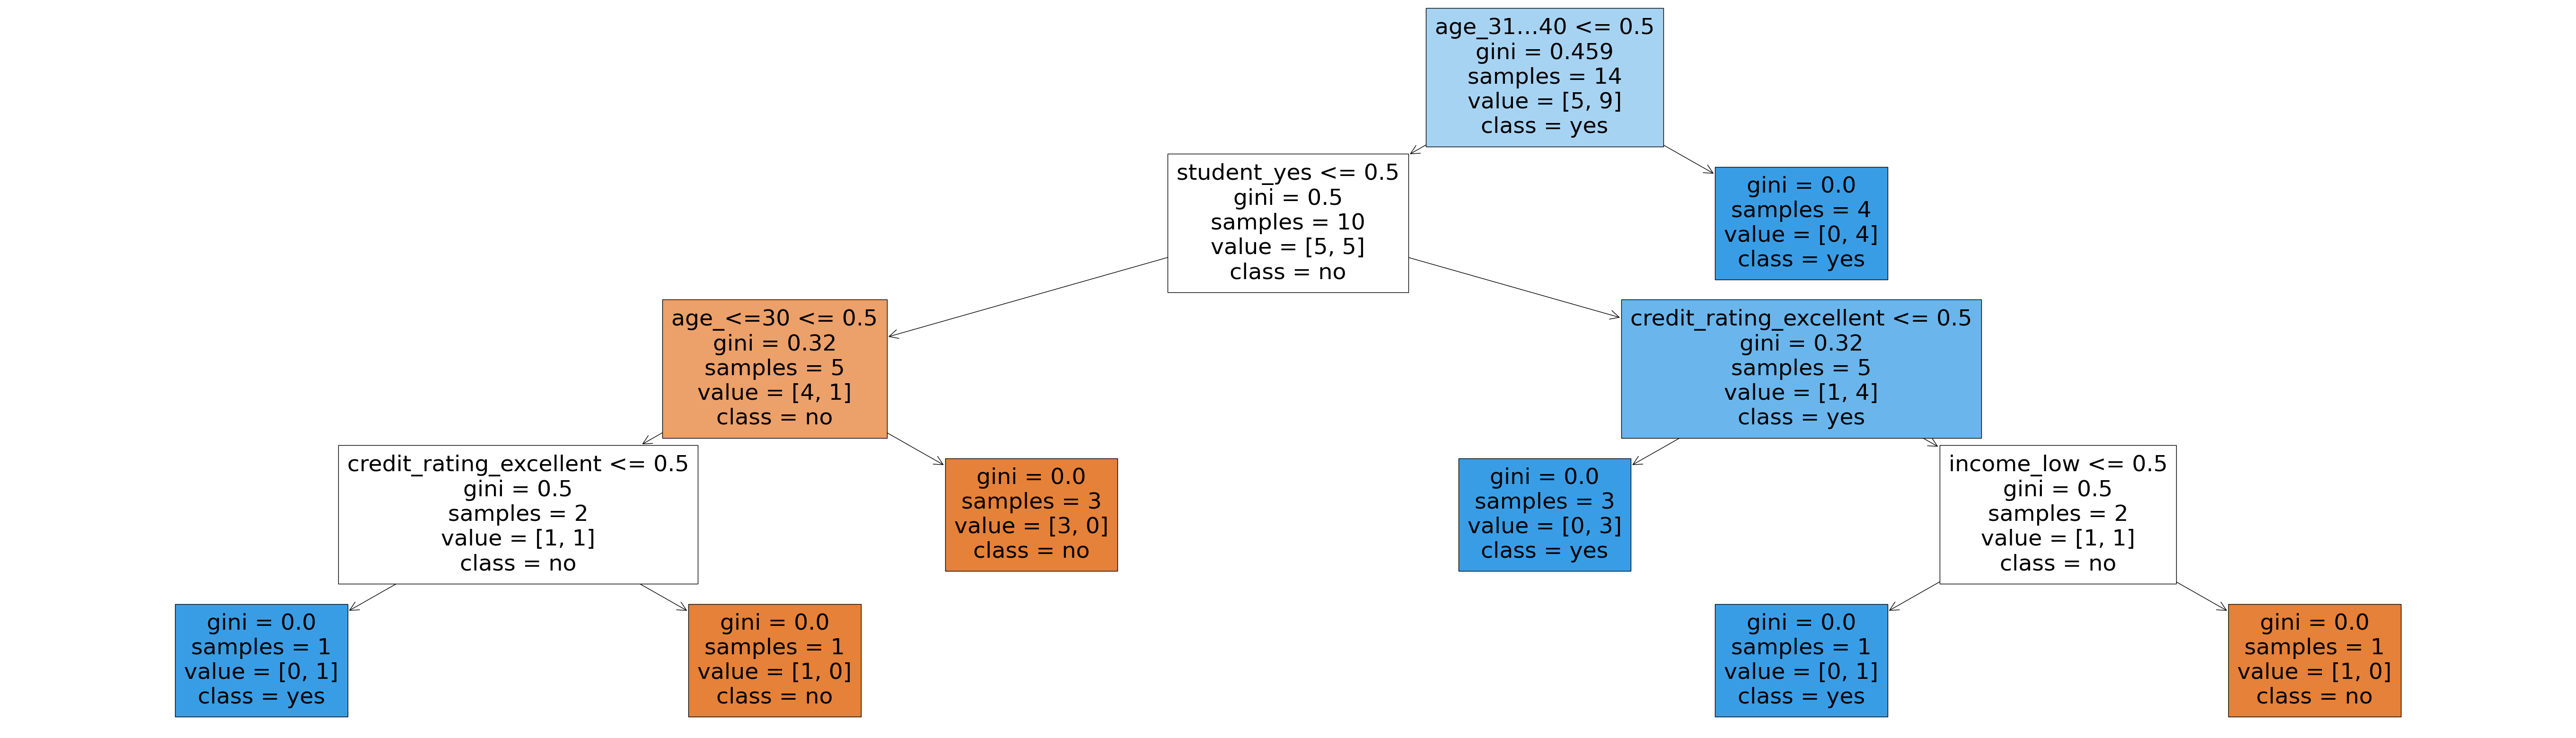

In [ ]:
import graphviz #plotting graphs we need this module
model.fit(X_train, Y_train)
dot_data = tree.export_graphviz(model, out_file=None, filled=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Save the decision tree as a PDF file
graph.view()  # Open the decision tree in a viewer


A4. Create a Decision Tree classifier on your project data. Study the accuracy for training and test
data and infer the accuracy of tree construction. Plot the Decision Tree obtained above

In [ ]:
from sklearn.tree import DecisionTreeClassifier
df1=pd.read_excel(r"/content/embeddingsdata.xlsx")
df=pd.DataFrame(df1)
X=df.drop('Label',axis=1)
Y=df['Label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
# Create the Decision Tree classifier
model = DecisionTreeClassifier()
# Fit the model on the training data
model.fit(X_train, Y_train)
# Calculate the accuracy for the training set
train_accuracy = model.score(X_train, Y_train)
print("Training Set Accuracy:", train_accuracy)
# Calculate the accuracy for the test set
test_accuracy = model.score(X_test,Y_test)
print("Test Set Accuracy:", test_accuracy)
# Plot the Decision Tree
plt.figure(figsize=(12, 6))
tree.plot_tree(model, filled=True)
plt.show()


KeyError: ignored

A5. Impose a max_depth constraint on the tree construction. Construct the tree again and check the
accuracies. Visualize the tree constructed with max_depth constraint

Training Set Accuracy (Entropy Criterion): 1.00
Test Set Accuracy (Entropy Criterion): 0.67


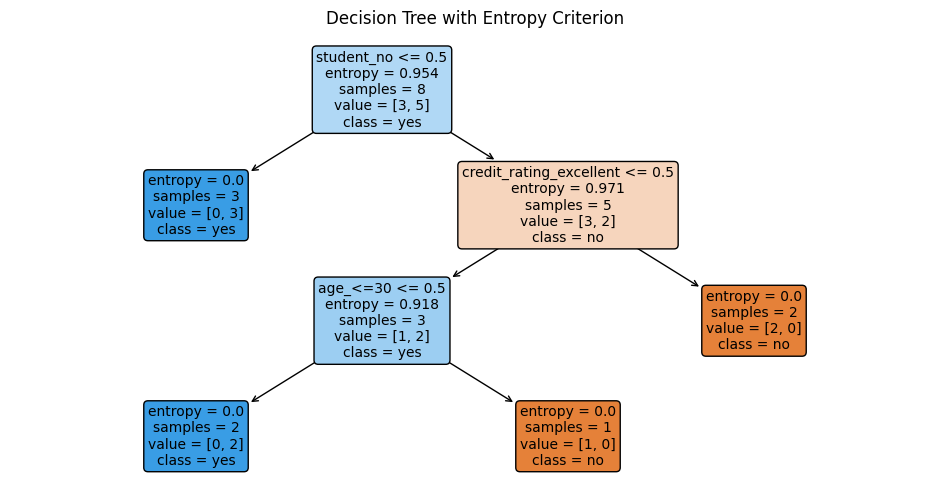

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
# Create the decision tree classifier with max_depth constraint
model = DecisionTreeClassifier(max_depth=5)
# Train the model
model.fit(X_train, Y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate the accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
# Visualize the decision tree
fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(model, filled=True)
plt.show()

A6. Study the criterion of the DT in the above model. Change the criterion to “Entropy” and study
the model & graph. Find the differences between the default criterion and entropy criterion. Refer
code below for criterion.

Accuracy with default criterion='entropy': 1.00


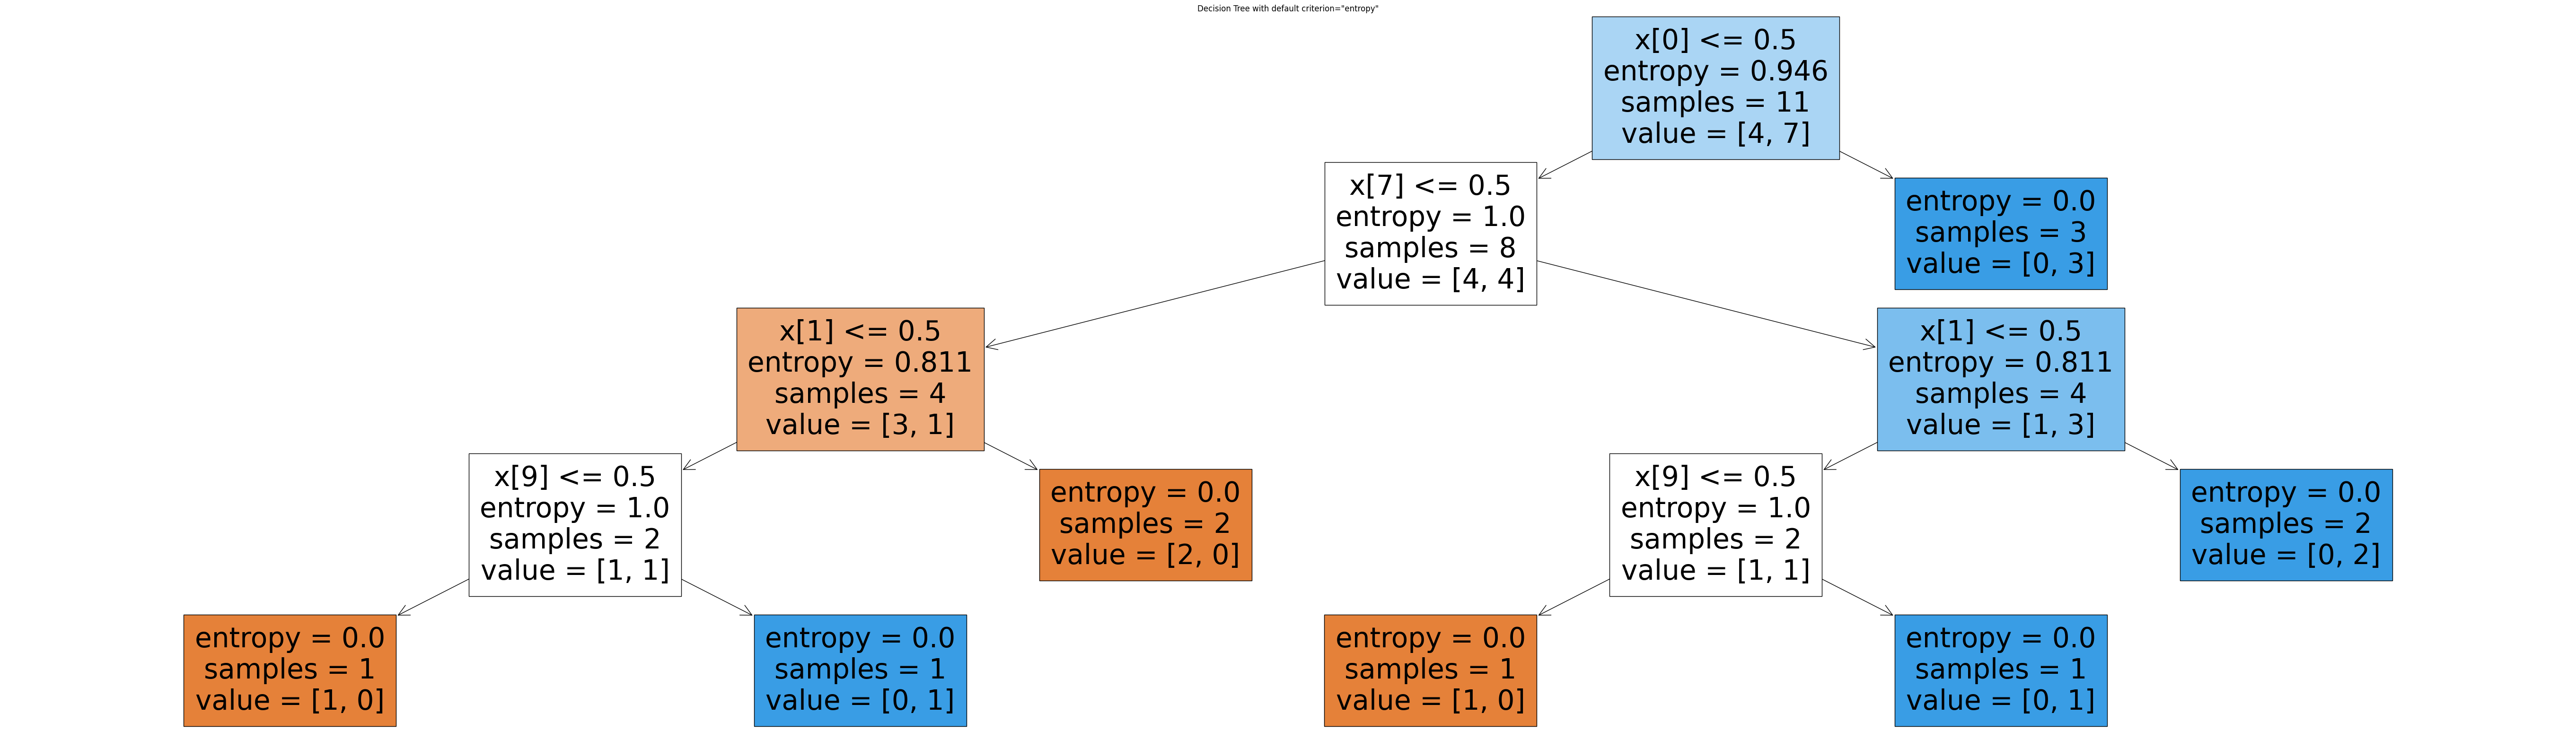

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
# Create the decision tree classifier with entropy criterion
model = DecisionTreeClassifier(criterion='entropy')
# Train the model
model.fit(X_train, Y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate the accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
# Visualize the decision tree
fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(model, filled=True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Create a decision tree classifier
decision_tree = DecisionTreeClassifier()
# Train the decision tree classifier
decision_tree.fit(X_train, Y_train)
# Make predictions on the test set using the decision tree classifier
y_pred_decision_tree = decision_tree.predict(X_test)
# Calculate performance metrics for the decision tree classifier
accuracy_decision_tree = accuracy_score(Y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(Y_test, y_pred_decision_tree, average='weighted')
recall_decision_tree = recall_score(Y_test, y_pred_decision_tree, average='weighted')
f1_score_decision_tree = f1_score(Y_test, y_pred_decision_tree, average='weighted')
# Create a random forest classifier
random_forest = RandomForestClassifier()
# Train the random forest classifier
random_forest.fit(X_train, Y_train)
# Make predictions on the test set using the random forest classifier
y_pred_random_forest = random_forest.predict(X_test)
# Calculate performance metrics for the random forest classifier
accuracy_random_forest = accuracy_score(Y_test, y_pred_random_forest)
precision_random_forest = precision_score(Y_test, y_pred_random_forest, average='weighted')
recall_random_forest = recall_score(Y_test, y_pred_random_forest, average='weighted')
f1_score_random_forest = f1_score(Y_test, y_pred_random_forest, average='weighted')
# Print the performance metrics for both classifiers
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_decision_tree)
print("Precision:", precision_decision_tree)
print("Recall:", recall_decision_tree)
print("F1 Score:", f1_score_decision_tree)

print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_random_forest)
print("Precision:", precision_random_forest)
print("Recall:", recall_random_forest)
print("F1 Score:", f1_score_random_forest)

NameError: ignored

A8.Study thevarious parameters and model attributes of random forest classifier. Understand their significance in the behavior of the model.

In [ ]:
# Print the submodules of the RandomForestClassifier module
print(dir(RandomForestClassifier))
